In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data set
tree=pd.read_csv('Fraud_check.csv')
tree

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Exploratory data analysis(EDA)

In [3]:
#check the dataset shape
tree.shape

(600, 6)

In [4]:
#check any null values is there
tree.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
# describe the data
tree.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
# information of dataset
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
# check any duplicated values is there in data set
tree.duplicated().any()

False

# Feature Engineering

In [8]:
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
tree1=tree.copy()
tree1['Taxable.Income'] = pd.cut(x = tree1['Taxable.Income'], bins = [10002,30000,99620], labels=["Risky" ,"Good"], right = False)
tree1.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [9]:
tree1['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [10]:
tree1.shape

(600, 6)

In [11]:
tree1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    category
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 24.3+ KB


In [12]:
categorical_features = tree1.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'Urban'], dtype='object')

In [13]:
numerical_features = tree1.describe(include=["int64","float64"]).columns
numerical_features

Index(['City.Population', 'Work.Experience'], dtype='object')

# Data Visualization

Taxable.Income


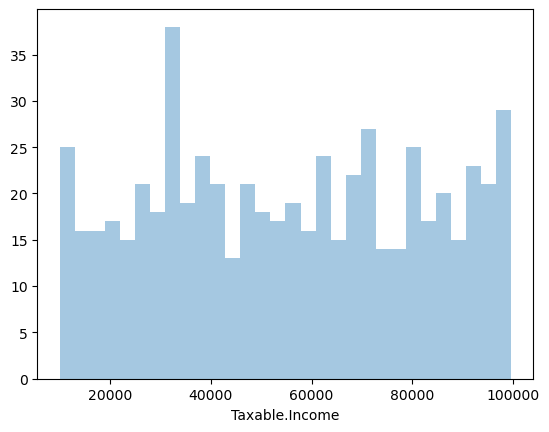

City.Population


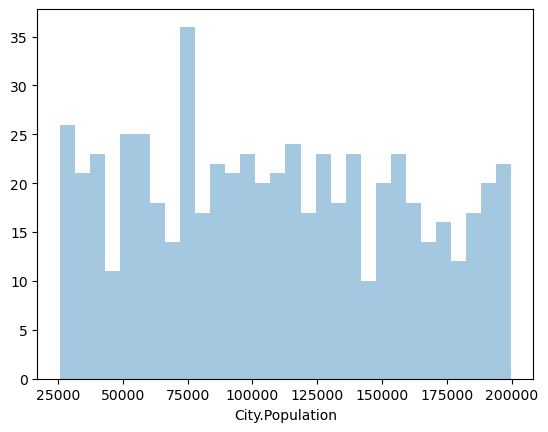

Work.Experience


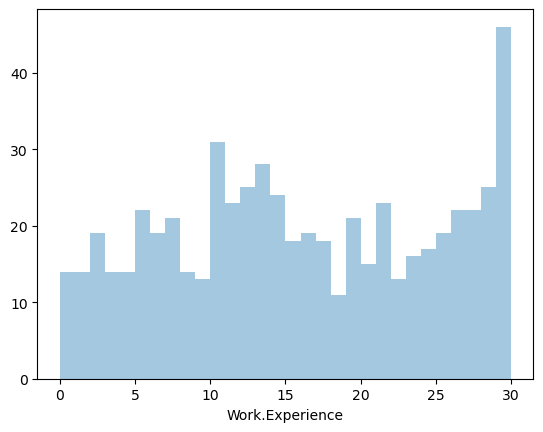

In [14]:
numerical_features=[feature for feature in tree.columns if tree[feature].dtype !='O']
for i in numerical_features:
    print(i)
    skew = tree[i].skew()
    sns.distplot(tree[i],kde=False,label='Skew = %.3f' %(skew), bins=30)
    plt.show()

# Treating outliers

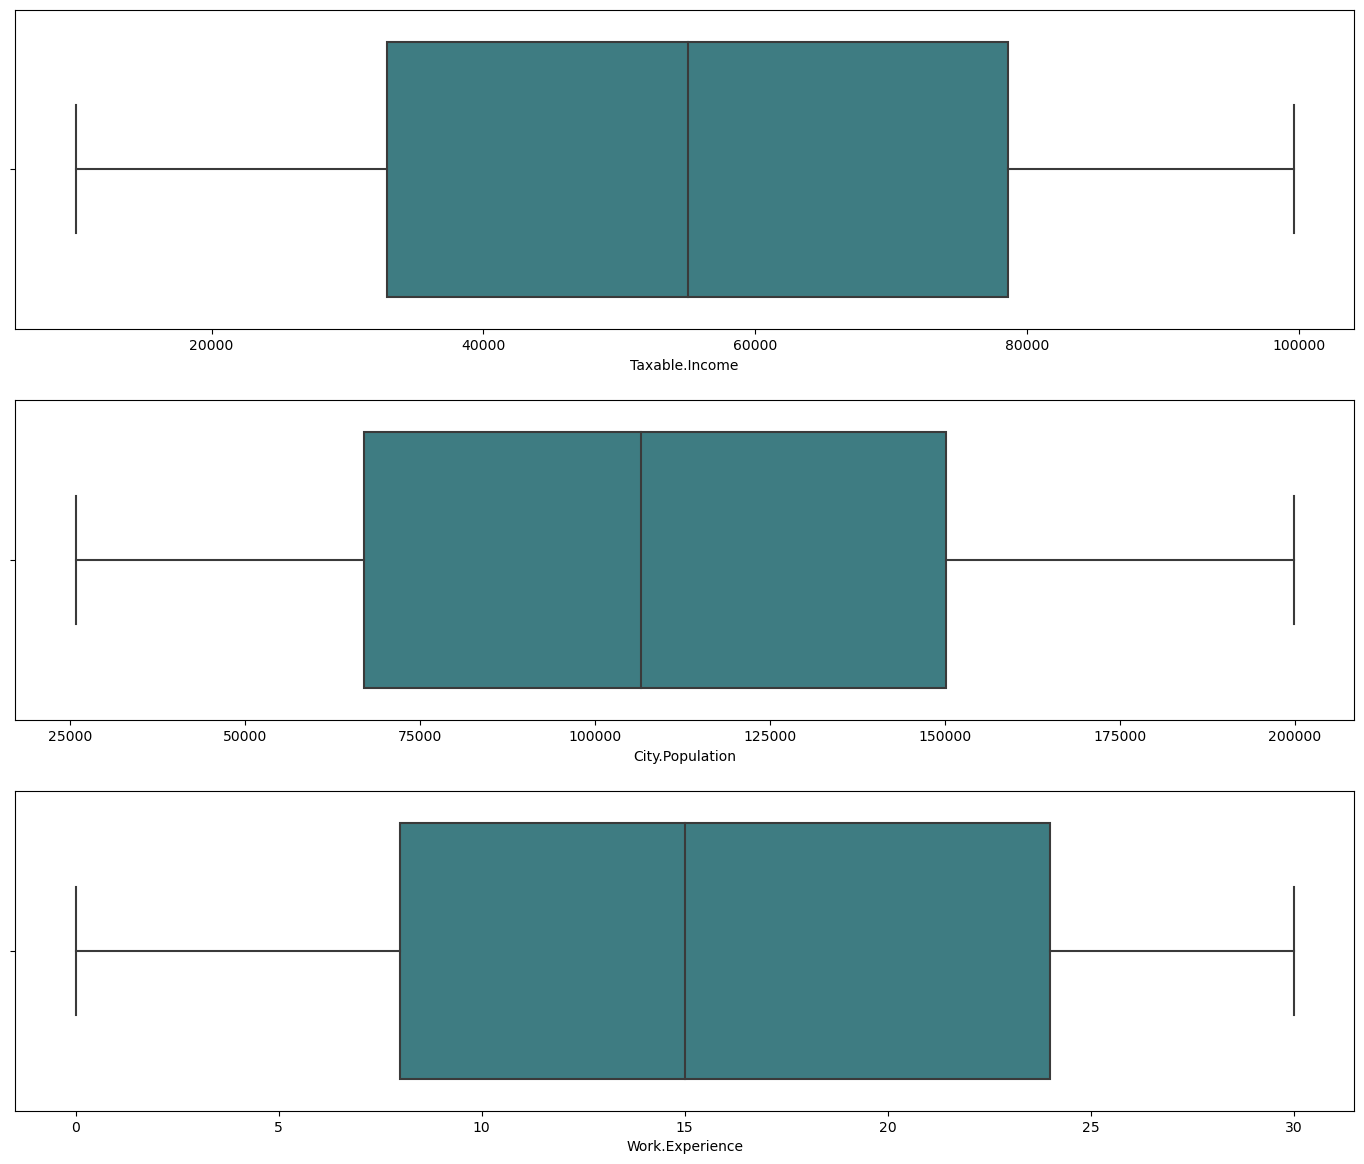

In [15]:
ot=tree.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<Axes: >

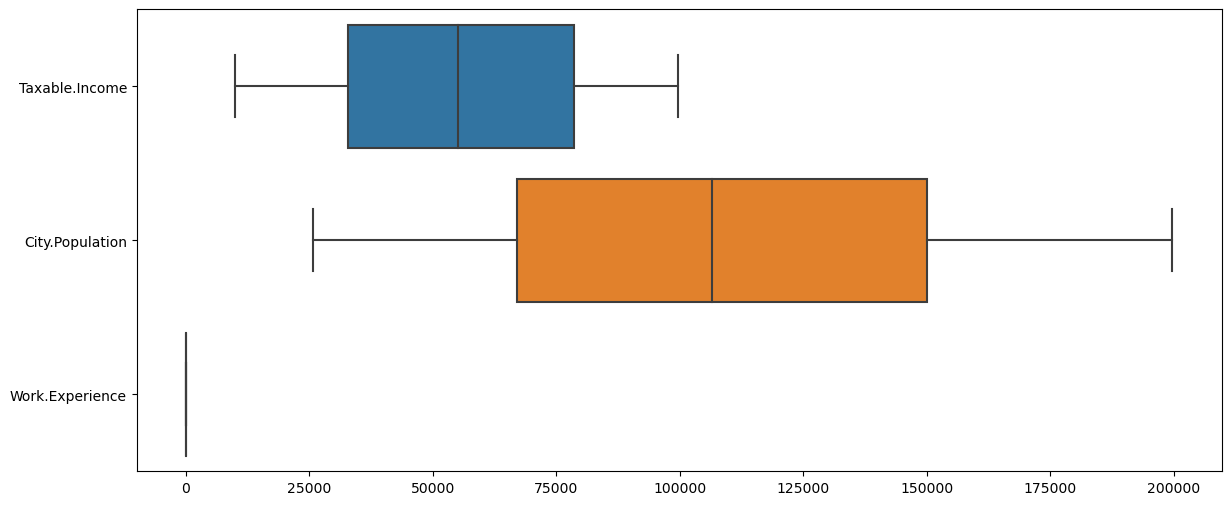

In [16]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=tree[numerical_features], orient="h")

#Unsurprisingly, Population has a mean that is much superior to the other constituents as we already saw in the previous section.

# Multivariate Analysis

<Figure size 800x800 with 0 Axes>

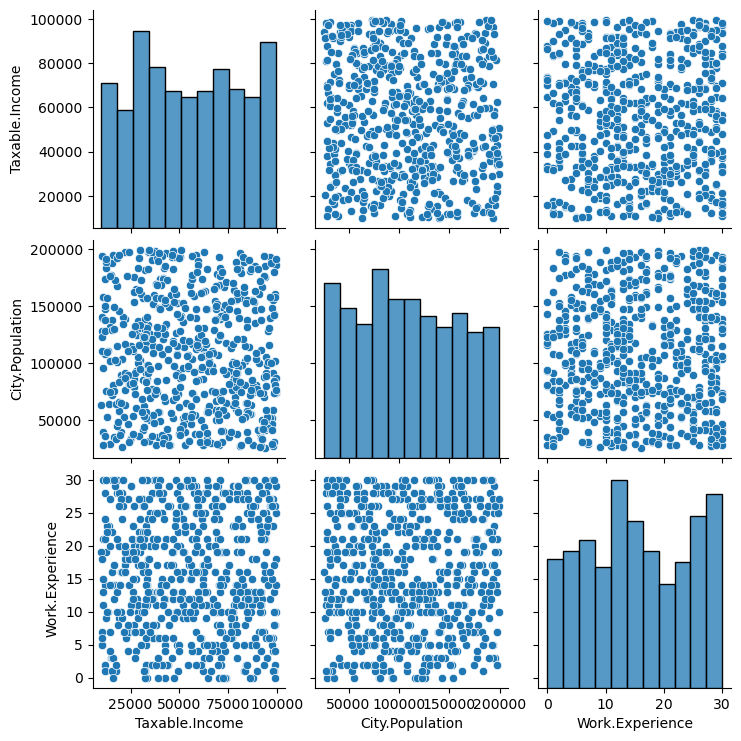

In [17]:
plt.figure(figsize=(8,8))
sns.pairplot(tree, palette='coolwarm')
plt.show()

<Axes: >

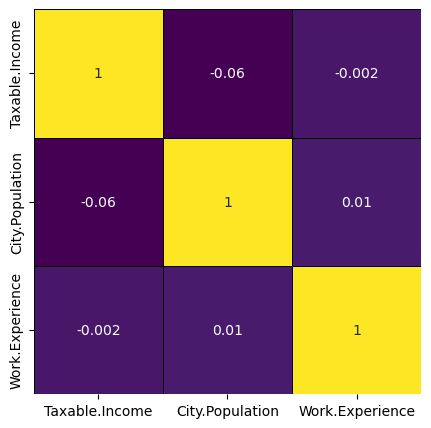

In [18]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(tree.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'Urban'], dtype='object')


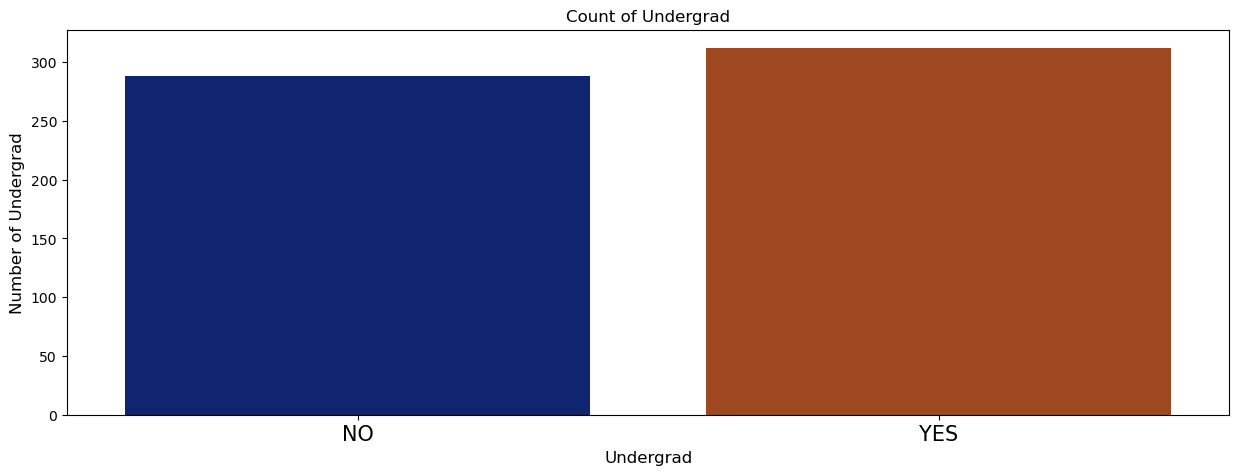

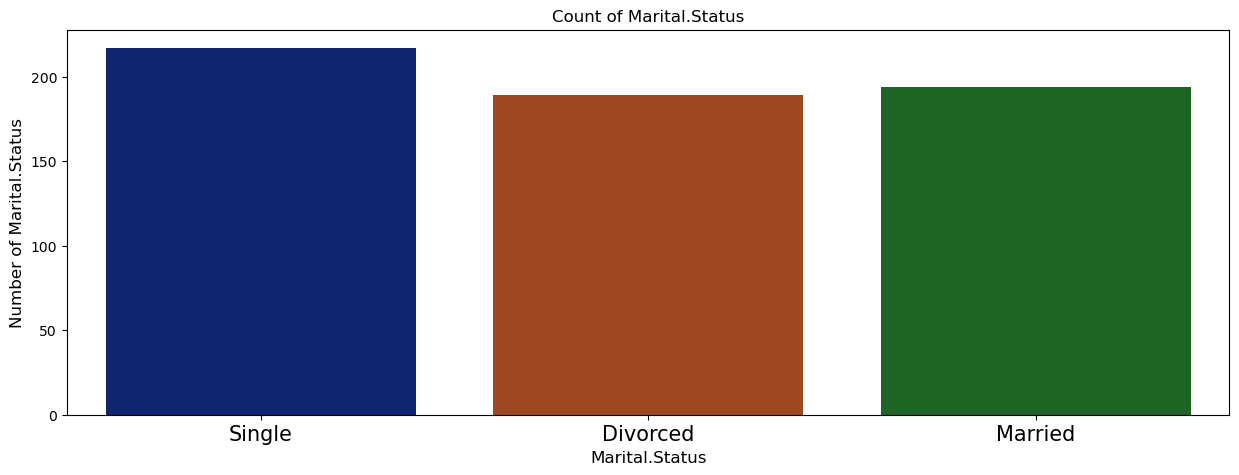

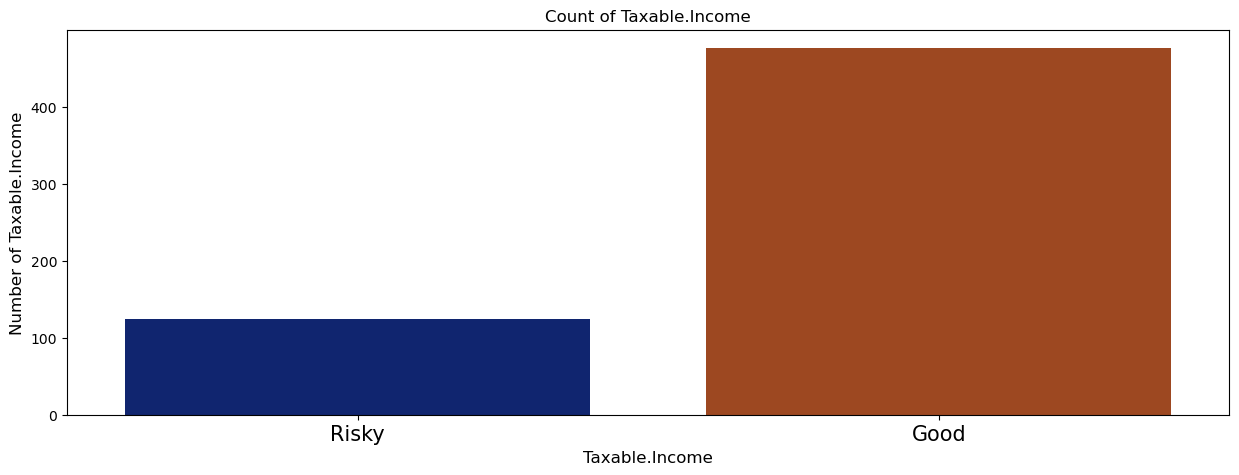

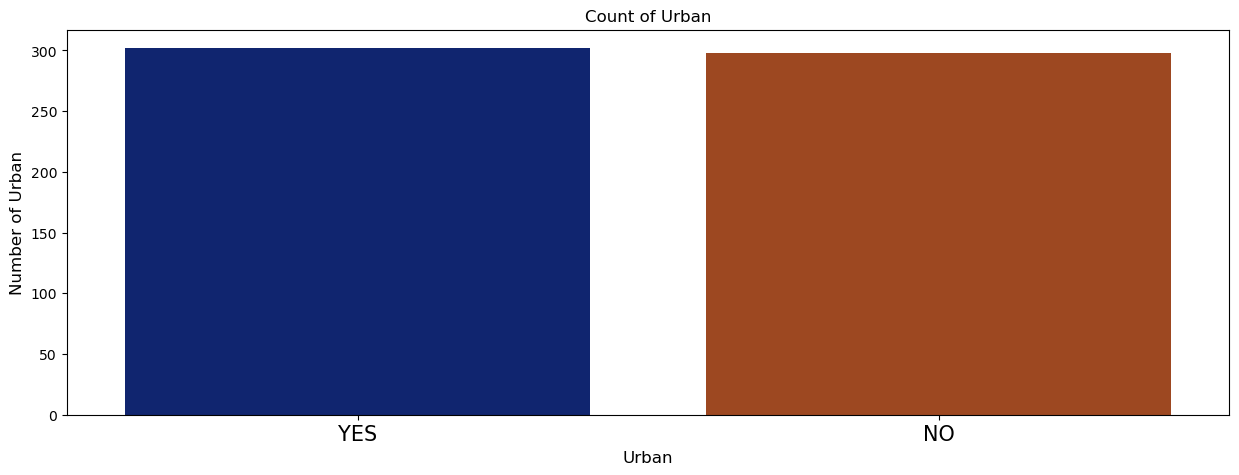

In [19]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = tree1[column].value_counts(ascending=True);
 
    
    plt.title("Count of "+ column)
    sns.countplot(data=tree1, x=column,palette = "dark")
    
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

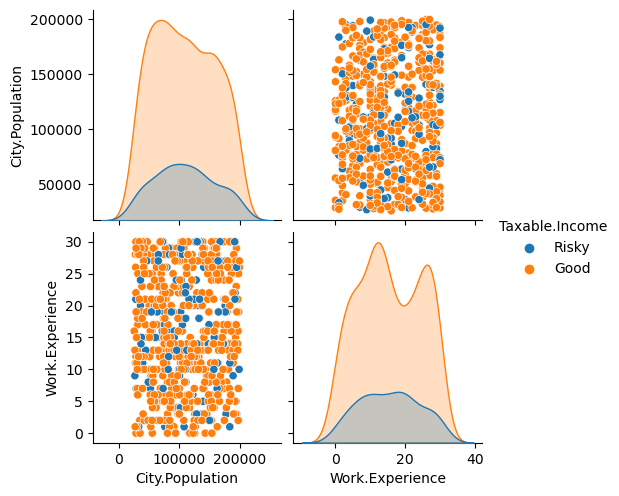

In [20]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=tree1, hue = 'Taxable.Income')

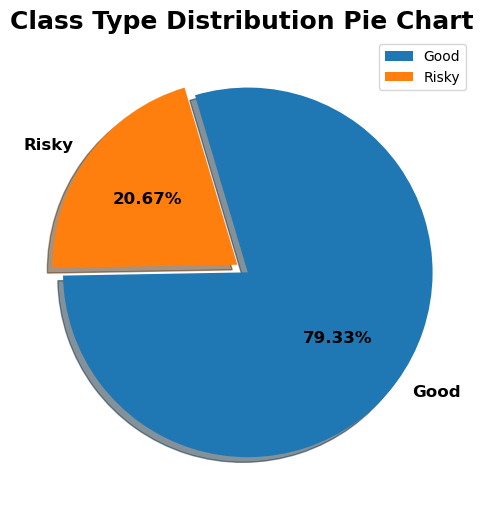

In [21]:
plt.figure(figsize = (10,6))
plt.pie(tree1['Taxable.Income'].value_counts(),
       labels=tree1['Taxable.Income'].unique(),
       explode = [0.04,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Pre-Processing

In [22]:
data = tree1.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'Urban'], dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
#Creating dummy vairables of the categorical features
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [24]:
data.Taxable_Income.value_counts()

0    476
1    124
Name: Taxable_Income, dtype: int64

In [25]:
features=data.drop('Taxable_Income',axis=1)
features

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [26]:
target=data[['Taxable_Income']]
target.value_counts()

Taxable_Income
0                 476
1                 124
dtype: int64

# Split data as training data and testing data

In [67]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.7,random_state=50)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 5)
(180, 5)
(420, 1)
(180, 1)


In [69]:
# fit the model
rand_frst= RandomForestClassifier( bootstrap=True, n_estimators=100,criterion='gini',min_samples_split=2, max_features='sqrt',max_depth=8)

In [70]:
rand_frst.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [71]:
#prediction
y_pred= rand_frst.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [72]:
accuracy_score(y_test,y_pred)

0.7944444444444444

<Axes: >

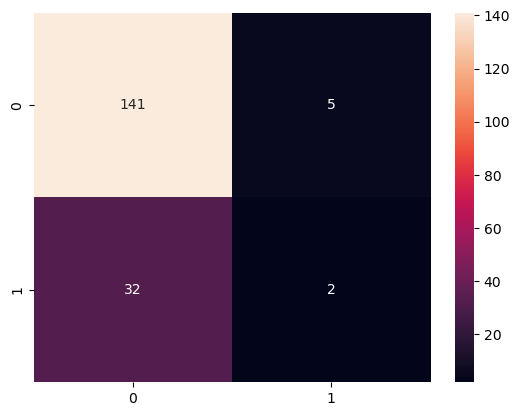

In [73]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.88       146
           1       0.29      0.06      0.10        34

    accuracy                           0.79       180
   macro avg       0.55      0.51      0.49       180
weighted avg       0.72      0.79      0.74       180



# Randomized Search Cross Validation

In [75]:
params= {'criterion':['gini','entropy'],
         'n_estimators':[int(x) for x in np.linspace(0,200,200)],
         'max_depth':[1,2,5,7,8,10,12,15],
         'max_features':['sqrt','log2','auto'],
         'min_samples_split':[int(x) for x in np.linspace(0,20,20)], 
         'min_samples_leaf':[int(x) for x in np.linspace(0,10,10)],
         'bootstrap':[True,False],
         }
               
rand_frst=RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=8,max_features='sqrt', min_samples_split=2,
    min_samples_leaf=1, bootstrap=True,n_jobs=None,verbose=0)                                                                                                                   
rand_sear= RandomizedSearchCV(rand_frst,params)

rand_sear.fit(x_train,y_train)
rand_sear.best_params_

{'n_estimators': 73,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 7,
 'criterion': 'gini',
 'bootstrap': False}

In [82]:
# fit the model
rand_frst= RandomForestClassifier( bootstrap=False, n_estimators=73,criterion='gini',min_samples_split=6, max_features='auto',max_depth=7)

In [83]:
rand_frst.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=7, max_features='auto',
                       min_samples_split=6, n_estimators=73)

In [84]:
#prediction
y_pred= rand_frst.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [85]:
accuracy_score(y_test,y_pred)

0.8

<Axes: >

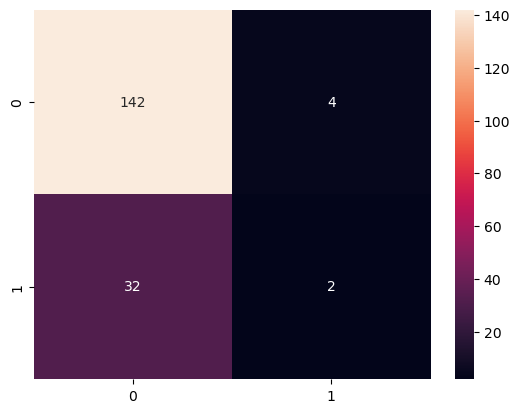

In [86]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       146
           1       0.33      0.06      0.10        34

    accuracy                           0.80       180
   macro avg       0.57      0.52      0.49       180
weighted avg       0.72      0.80      0.74       180

